In [1]:
import numpy as np
import control as co
import sympy as sym
import matplotlib.pyplot as plt
from ipywidgets import interact
sym.init_printing()

In [2]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

In [3]:
output_notebook()

Loading BokehJS ...

### Order of a system

* The order refers to the order of the equivalent differential equation representing the system
* The order of the denominator of the transfer function after cancellation of common factors in the numerator.
* The number of simultaneous first-order equations required for the state-space representation.

### System Response
**Forced response:** For linear systems, that part of the total response function due to the input. It is typically of the same form as the input and its derivatives.

**Natural response:** That part of the total response function due to the system and the way the system acquires or dissipates energy

The output response of a system is the sum of two responses: the forced response and the natural response.

### Poles of a Transfer Function
The poles of a transfer function are 
1. The values of the Laplace transform variable, s, that cause the transfer function to become infinite or 
2. Any roots of the denominator of the transfer function that are common to roots of the numerator

In general, G(s) is a rational function of the form
$$G(s) = \dfrac {N(s)}{D(s)}$$
When $D(s)=0$ the transfer function become to infinite.Hence the roots of $D(s)$ polynomial is called system poles.<br>
If $G(s)=\dfrac{s+2}{s^2+6s+25}$ then $N(s)=s+2$ and $D(s)=s^2+6s+25$
,

In [4]:
s=co.tf("s")
G=(s+2)/(s**2+6*s+25)
G

TransferFunction(array([1, 2]), array([ 1,  6, 25]))

In [5]:
co.pole(G)

array([-3.+4.j, -3.-4.j])

The system $G(s)=\dfrac{s+2}{s^2+6s+25}$ has two pole at $s=-3+4j$, $-3-4j$

### Zeros of a Transfer Function
The zeros of a transfer function are 
1. The values of the Laplace transform variable, s, that cause the transfer function to become zero or 
2. Any roots of the numerator of the transfer function that are common to roots of the denominator

### Pole-Zero plot

### Poles and Zeros of a First-Order System: An Example
Suppose the system transfer function $$G(s)=\dfrac{s+2}{s+5}$$
If the reference input is $R(s)$ and output response is $C(s)$ in frequency domain then$$C(s)=G(s)R(s)$$
When reference input $R(s)=\dfrac{1}{s}$ the output response $$C(s)=\dfrac{1}{s}\times \dfrac{s+2}{s+5}=\dfrac{s+2}{s(s+5)}$$
Partial fraction of $C(s)$ is $$C(s)=\dfrac{A}{s}+\dfrac{B}{s+5}$$

$$
\begin{align}
A&=\dfrac{s+2}{s+5}|_{s=0} =\dfrac{2}{5}\\ 
\\
B&=\dfrac{s+2}{s}|_{s=-5}=\dfrac{3}{5}
\end{align}
$$
Now $C(s)=\dfrac{2/5}{s}+\dfrac{3/5}{s+5}$


So time domain step response of this first order system is $$c(t)=\left [\dfrac{2}{5}+\dfrac{3}{5}\times e^{-5t}\right ]u(t)$$

**Code**

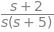

In [6]:
t, s = sym.symbols('t, s')
C=(s+2)/(s*(s+5))
C

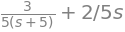

In [7]:
partial_fraction=C.apart(s)
partial_fraction

In [8]:
c_t=sym.inverse_laplace_transform(partial_fraction, s,t)
c_t

The pole zero plot of $C(s)=\dfrac{s+2}{s(s+5)}$ is shown bt python code

In [9]:
from bokeh.models import HoverTool
s=co.tf("s")
C=(s+2)/(s*(s+5))
pole=C.pole()
zero=C.zero()
hover=HoverTool(tooltips=[("(x, y)", "($x, $y)")])
p=figure(plot_width=600, plot_height=300, 
        tools=[hover, "save", "reset", "wheel_zoom"])
#pole plot
p.x(pole.real, pole.imag, 
   size=15, 
   line_width=2, 
   color="DarkBlue")
#zero plot
p.circle(zero.real, zero.imag, 
        size=12, 
        color="DarkBlue", 
        fill_color="white", 
        line_width=2)

p.xaxis.fixed_location=0
p.yaxis.fixed_location=0

p.title.text="Pole-Zero plot on S plane"
p.title.text_color="DarkGreen"
p.title.text_font="ecotype"
p.title.text_font_size="18px"
p.title.align="center"
show(p)

Below figure shows the first order system step response evolution by inspection.
<img src="https://github.com/sayedul79/python-control-system/blob/main/image/first-order-system-response.png?raw=true">

From the above development we draw the following conclusion
1. A pole of the input function generates the form of the forced response (i.e., the pole at the origin generated a step function at the output).

In [10]:
s, t=sym.symbols('s, t')
pole_origin=1/s
inv_lap=sym.inverse_laplace_transform(pole_origin, s, t)
inv_lap

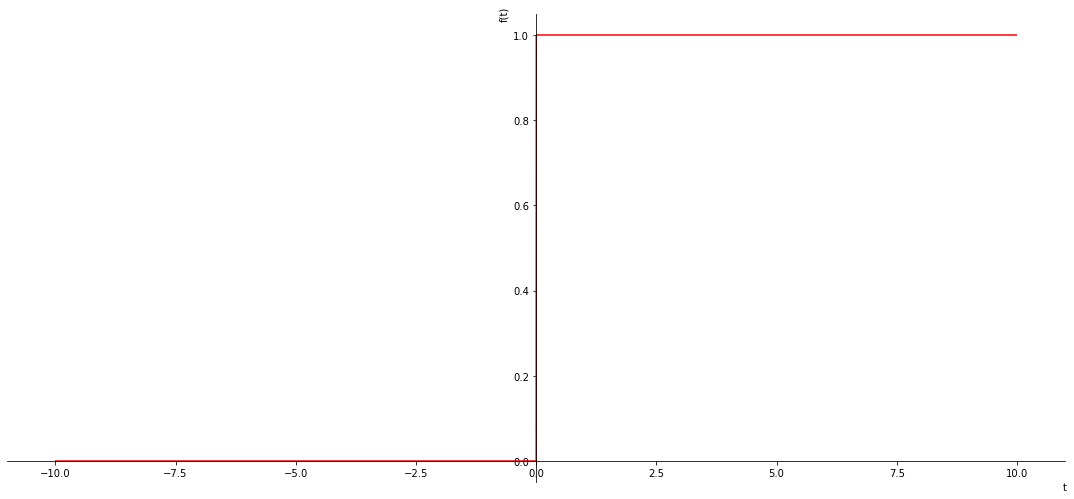

In [11]:
sym.plot(inv_lap, line_color="red", 
         size=(15,7))

2. A pole of the transfer function generates the form of the natural response (i.e., the pole at −5 generated $e^{−5t}$).

In [12]:
s, t=sym.symbols("s, t")
pole_real_axis=1/(s+1)
inv_lap=sym.inverse_laplace_transform(pole_real_axis, s, t)
inv_lap

In [13]:
from bokeh.models import HoverTool, ColumnDataSource
t=np.arange(0, 4, .001) #t>=0
inv_lap=np.exp(-3*t)
source=ColumnDataSource(data={"t":t, "inv_lap":inv_lap})

hover=HoverTool(tooltips=[("(time, Amplitude)", "(@t, @inv_lap)")])
p=figure(plot_width=600, plot_height=500, 
        tools=[hover, "save", "reset", "wheel_zoom"])
p.line(x="t", y="inv_lap", 
      source=source, 
      line_width=2, 
      line_color="DarkBlue")
p.xaxis.fixed_location=0
p.yaxis.fixed_location=0
show(p)

3. A pole on the real axis generates an exponential response of the form $e^{−αt}$, where −α is the pole location on the real axis. Thus, the farther to the left a pole is on the negative real axis, the faster the exponential transient response will decay to zero (again, the pole at −5 generated $e^{−5t}$.

In [14]:
def decay_interact(a):
    t=np.arange(0,5, .01)
    y=np.exp(a*t)
    plt.figure(4,figsize=(8,5))
    ax=plt.axes()
    ax.plot(t, y, color="red",
             linewidth=2,
             label=fr"$a={a}$")
    #move left y axis and bottom x axis to center (0,0)
    ax.spines["left"].set_position("zero")
    ax.spines["bottom"].set_position("zero")
    #Eliminate upper and right axes
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xlim(0, np.max(t))
    ax.set_ylim(0, np.max(y))
    ax.grid()
    ax.legend()

In [15]:
%matplotlib inline
interact(decay_interact, a=(-8, -0.1, 0.1))

interactive(children=(FloatSlider(value=-4.1, description='a', max=-0.1, min=-8.0), Output()), _dom_classes=('…

<function __main__.decay_interact(a)>

<img src="https://github.com/sayedul79/python-control-system/blob/main/image/effefct-of-real-axis-pole-upon-transient-response.png?raw=true">
Each pole of the system transfer function that is on the real axis
generates an exponential response that is a component of the natural response. The
input pole generates the forced response.


4. The zeros and poles generate the amplitudes for both the forced and natural responses .

### Evaluating Response Using Poles
<img src="https://github.com/sayedul79/python-control-system/blob/main/image/Evaluating%20Response%20Using%20Poles.png?raw=true">

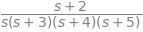

In [16]:
s, t=sym.symbols("s, t")
G=(s+2)/((s+3)*(s+4)*(s+5))
R=1/s
C=G*R
C

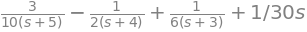

In [17]:
partial_fraction_C=C.apart(s)
partial_fraction_C

In [18]:
c_time_domain=sym.inverse_laplace_transform(partial_fraction_C, s, t)
c_time_domain

### First-order system
We now discuss first-order systems without zeros to define a performance
specification for such a system. A first-order system without zeros can be described by
the transfer function $G(s)=\dfrac {a}{s+a}$. If the input is a unit step, where $R(s) =\dfrac{1}{s}$, the Laplace transform of the step response is $C(s)$, where $$C(s)=\dfrac{a}{s(s+a)}$$

In [19]:
a, b, s, t=sym.symbols("a, b, s, t", real=True)
C=a/(s*(s+a))
partial_fraction_C=C.apart(s)
partial_fraction_C

In [20]:
c_time_domain=sym.inverse_laplace_transform(partial_fraction_C, s, t)
c_time_domain

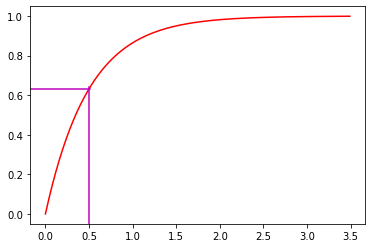

In [21]:
a=2
time_constant=1/a
t=np.arange(0, 7*time_constant, step=.01)
c_t=1-np.exp(-a*t)
#final value of c(t) when t tends to infinity
final_value=1
#value of c(t) when t=one time constant 
c_time_constant_1=0.63*final_value
#plot figure
plt.plot(t, c_t, color="red")
plt.axvline(x=time_constant, 
            ymax=c_time_constant_1, 
            color="m")
plt.axhline(y=c_time_constant_1, 
            color="m",
            xmax=0.18)

Let us examine the significance of parameter a, the only parameter needed to describe
the transient response. When $t =\dfrac{1}{a}$,
 $$e^{-at}|_{t=1/a}=e^{-1}=0.37 \tag{1}$$
 
 
 From first order time domain response $c(t)=[1-e^{-at}]u(t)$
 At t=1/a $$c(t)|_{t=1/a}=1-e^{-at}|_{t=1/a}=1-0.37=0.63 \tag{2}$$

### [Time Constant](https://en.wikipedia.org/wiki/Time_constant#:~:text=In%20physics%20and%20engineering%2C%20the,a%20first%2Dorder%20LTI%20system.)
The time constant **($\tau$)** is the parameter characterizing the response to a step input of a first-order, linear time-invariant (LTI) system. The time constant is the main characteristic unit of a first-order LTI system.
* We call 1/a the time constant of the response. From Eq. (1), the time constant can be described as the time for $e^{-at}$ to decay to 37% of its initial value.<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/Series_RC_resistor_voltage.svg/800px-Series_RC_resistor_voltage.svg.png"/> Alternately, from Eq. (2), the time constant is the time it takes for the step response to rise to 63% of its final value.<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/Series_RC_capacitor_voltage.svg/800px-Series_RC_capacitor_voltage.svg.png"/>


* The reciprocal of the time constant has the units (1/seconds), or frequency. Thus, we can call the parameter **a** the **exponential frequency**. Since the derivative of $e^{{-at}$ is −a when t = 0, a is the initial rate of change of the exponential at t = 0. Thus, the time constant can be considered a transient response specification for a first-order system, since it is related to the speed at which the system responds to a step input.


* The time constant can also be evaluated from the pole plot <img src="https://github.com/sayedul79/python-control-system/blob/main/image/4.4.png?raw=true">. Since the pole of the transfer function is at −a, we can say the pole is located at the reciprocal of the time constant, and the farther the pole from the imaginary axis, the faster the transient response.

### Rise Time, $T_r$
The time required for the step response to go from 0.1 (10%) of the final
value to 0.9 (90%) of the final value.